In [121]:
import pandas as pd

heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

age — возраст
sex — пол (1 - мужчина, 0 - женщина)
cp — тип боли в груди (4 значения)
trestbps — артериальное давление в покое
chol — холестерин сыворотки в мг/дл
fbs — уровень сахара в крови натощак > 120 мг/дл
restecg — результаты электрокардиографии в покое (значения 0,1,2)
thalach — достигнута максимальная частота сердечных сокращений
exang — стенокардия, вызванная физической нагрузкой
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
slope — наклон пикового сегмента ST при нагрузке
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [122]:
#Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.В ответ введите результат выполнения кода heart['old'].sum().
heart['old']=heart['age'].apply(lambda x: 1 if x > 60 else 0)


In [123]:
heart['old'].sum()

79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

Возраст (лет)	Мужчины	Женщины
до 20	123/76	116/72
21-30	126/79	120/75
31-40	129/81	127/80
41-50	135/83	137/84
51-60	142/85	144/85
61 и старше	142/80	159/85
В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [124]:
def get_trestbps_mean(row):
    if row['sex'] == 1:
        if row['age'] < 21:
            return '123'
        elif 20 < row['age'] < 31:
            return '126'
        elif 30 < row['age'] < 41:
            return '129'
        elif 40 < row['age'] < 51:
            return '135'
        elif 50 < row['age'] < 61:
            return '142'
    else:
        if row['age'] > 61:
            return '142'
    if row['sex'] == 0:
        if row['age'] < 21:
            return '116'
        elif 20 < row['age'] < 31:
            return '120'
        elif 30 < row['age'] < 41:
            return '127'
        elif 40 < row['age'] < 51:
            return '137'
        elif 50 < row['age'] < 61:
            return '144'
    else:
        if row['age'] > 61:
            return '159'

heart['trestbps_mean']=heart[['age', 'sex']].apply(get_trestbps_mean, axis=1)


In [125]:
heart.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0,0,129
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0,1,None
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0,0,135
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0,0,142
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0,0,142
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0,0,142
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0,0,144
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1,None
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,0,142
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0,0,144


In [101]:
import category_encoders as ce # импортируем библиотеку для работы с кодировщиками

encoder=ce.OneHotEncoder(cols=['cp'], use_cat_names=True)
type_bin=encoder.fit_transform(heart['cp'])
heart=pd.concat([heart, type_bin], axis=1)
encoder=ce.OneHotEncoder(cols=['restecg'], use_cat_names=True)
type_bin=encoder.fit_transform(heart['restecg'])
heart=pd.concat([heart, type_bin], axis=1)
encoder=ce.OneHotEncoder(cols=['slope'], use_cat_names=True)
type_bin=encoder.fit_transform(heart['slope'])
heart=pd.concat([heart, type_bin], axis=1)
encoder=ce.OneHotEncoder(cols=['ca'], use_cat_names=True)
type_bin=encoder.fit_transform(heart['ca'])
heart=pd.concat([heart, type_bin], axis=1)
encoder=ce.OneHotEncoder(cols=['thal'], use_cat_names=True)
type_bin=encoder.fit_transform(heart['thal'])
heart=pd.concat([heart, type_bin], axis=1)
heart = heart.drop(columns=['cp', 'restecg' ,'slope', 'ca', 'thal'], axis=1)


In [102]:
heart.shape

(303, 30)

In [103]:
heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,1,0,0,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,0,1,0,0,0,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,1,0,...,0,1,0,0,0,0,0,1,0,0


In [104]:
#Нормализуйте все числовые признаки подходящим способом.В ответе напишите стандартное отклонение признака chol. 
# Ответ округлите до шести знаков после запятой.


import category_encoders as ce
from sklearn import preprocessing
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart[['chol']], y=None)
df_r=pd.DataFrame(df_r, columns=['chol'])
r_scaler = preprocessing.RobustScaler()


In [105]:
df_r.describe()

,chol
count,303.000000
mean,0.098646
std,0.816232
min,-1.795276
25%,-0.456693
50%,0.000000
75%,0.543307
max,5.102362


In [115]:
cor_list = [['age', 'old'], ['ca', 'ca_1'], ['age', 'cp'], ['slope', 'slope_3'], ['slope_2', 'slope_3'], 
            ['thal_2', 'thal_3'], ['cp', 'ca'], ['cp', 'cp_4'], ['thal_3', 'thal'], ['restecg_2', 'restecg'], 
            ['slope_2', 'slope'], ['restecg_1', 'restecg_2'], ['restecg_1', 'restecg'], ['restecg', 'restecg_2']]

cor_list_end = []

for elem in cor_list:
    cor_list_end.append(
        (elem, round(heart.corr(numeric_only=True)[elem[0]][elem[1]], 2))
    )


print([i for i in filter(lambda x: ((x[1] > 0.7) or (x[1] < -0.7)), cor_list_end)])

KeyError: 'ca'

C:\Users\админ\AppData\Local\Temp\ipykernel_15800\1172747614.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart.corr(), annot=True) # включаем отображение коэффициентов


<AxesSubplot: >

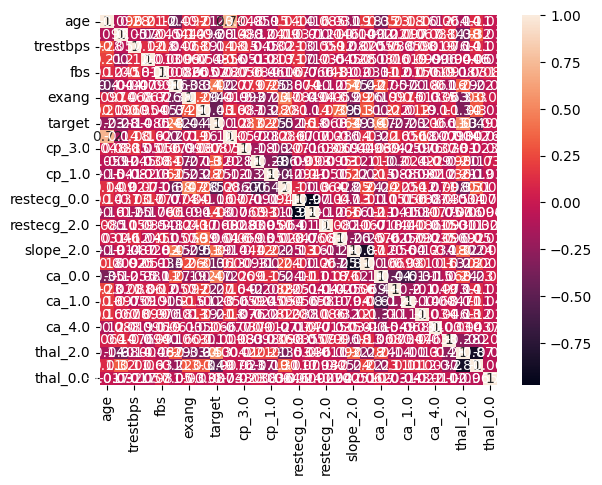

In [109]:
import seaborn as sns # импортируем seaborn для построения графиков
sns.heatmap(heart.corr(), annot=True) # включаем отображение коэффициентов

In [119]:
cor_list = [['age', 'trestbps'], ['ca_0.0', 'ca_1.0'], ['ca_4.0', 'cp_1.0'], ['slope_2.0', 'thal_2.0'], ['slope_2.0', 'restecg_0.0'], 
            ['thal_2.0', 'restecg_2.0'], ['fbs', 'exang'], ['target', 'age']]

cor_list_end = []

for elem in cor_list:
    cor_list_end.append(
        (elem, round(heart.corr(numeric_only=True)[elem[0]][elem[1]], 2))
    )


print([i for i in filter(lambda x: ((x[1] > 0.7) or (x[1] < -0.7)), cor_list_end)])

[]


In [108]:
import category_encoders as ce
from sklearn import preprocessing
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart[['chol']], y=None)
df_r=pd.DataFrame(df_r, columns=['chol'])
r_scaler = preprocessing.RobustScaler()

ValueError: Index data must be 1-dimensional

In [107]:
df_r.describe()

,age
count,303.000000
mean,-0.046938
std,0.672748
min,-1.925926
25%,-0.555556
50%,0.000000
75%,0.444444
max,1.629630


In [111]:
mm_scaler=preprocessing.MinMaxScaler()
df_mm=mm_scaler.fit_transform(heart)
df_mm=pd.DataFrame(df_mm, columns=heart.columns)

In [112]:
cor_list = [['age', 'old'], ['ca', 'ca_1'], ['age', 'cp'], ['slope', 'slope_3'], ['slope_2', 'slope_3'], 
            ['thal_2', 'thal_3'], ['cp', 'ca'], ['cp', 'cp_4'], ['thal_3', 'thal'], ['restecg_2', 'restecg'], 
            ['slope_2', 'slope'], ['restecg_1', 'restecg_2'], ['restecg_1', 'restecg'], ['restecg', 'restecg_2']]

cor_list_end = []

for elem in cor_list:
    cor_list_end.append(
        (elem, round(df_mm.corr(numeric_only=True)[elem[0]][elem[1]], 2))
    )


print([i for i in filter(lambda x: ((x[1] > 0.7) or (x[1] < -0.7)), cor_list_end)])

KeyError: 'ca'